I will begin by importing the libraries that will be used and also the data file obtained from the UCI ML repository: 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [3]:
online_retail = pd.read_excel(r'C:\Users\Equipo\Documents\Pythonities\Datasets\Online_Retail.xlsx')

I will now examine the condition of the dataset and see if it's missing some information:

In [4]:
online_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom


Note that we have the unit price and also the quantity, so we can calculate the purchased amount by multiplying these amounts. Let's do so:

In [5]:
online_retail['PurchasedAmount'] = online_retail.Quantity*online_retail.UnitPrice

In [6]:
online_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchasedAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3


In [7]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo          541909 non-null object
StockCode          541909 non-null object
Description        540455 non-null object
Quantity           541909 non-null int64
InvoiceDate        541909 non-null datetime64[ns]
UnitPrice          541909 non-null float64
CustomerID         406829 non-null float64
Country            541909 non-null object
PurchasedAmount    541909 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


Notice that all columns except CustomerID are >99% complete; CustomerID is missing more than 100,000 values! Let us now see how these missing values are distributed.

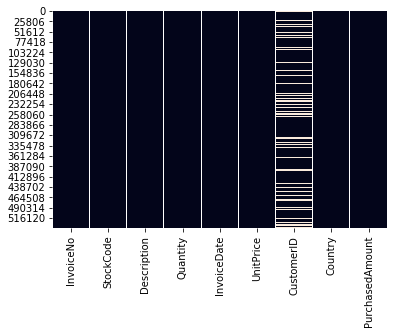

In [8]:
sns.heatmap(online_retail.isnull(), cbar=False)

So it seems we have missing CustomerIDs everywhere. We can still know where they're from, what they bought, how much, when and for what unit price, though. Let us keep that in mind for now.

I will now procede to examine each variable to see if we can find anything else that is off-setting. 

In [9]:
len(online_retail.CustomerID.unique())

4373

We can see that AT LEAST 4373 customers, from 01/12/2010 to 09/12/2011, bought something from the store. However, we don't know how many more clients the store had because many IDs are missing. We also cannot adequately compute the customers that had more or less purchases based on their IDs, because we can't attribute many of the items to anyone.

In [10]:
len(online_retail.Country.unique())

38

And we know these clients came from 38 different countries.

In [11]:
len(online_retail.Description.unique())

4224

If we take a look at the store's item descriptions, they seem to be very idiosyncratic. However, note that, in truth, there are only 4224 different types of items sold. 

In [12]:
len(online_retail.StockCode.unique())

4070

In [13]:
online_retail.UnitPrice.describe()

count   541909.0
mean         4.6
std         96.8
min     -11062.1
25%          1.2
50%          2.1
75%          4.1
max      38970.0
Name: UnitPrice, dtype: float64

Given that, numerically, price is a meaningful variable, I want to see how it is distributed: it's maximum, minimum and percentiles. Note that 75% of items sold have a unit price below 4.13. However, also note that the maximum is at 38970. Does this make sense? Moreoever, the minimum is a big negative number! We know a negative price makes no sense, so we definately need to explore this variable further. 

In [14]:
online_retail.UnitPrice[online_retail.UnitPrice < 0]

299983   -11062.1
299984   -11062.1
Name: UnitPrice, dtype: float64

Notice that only two transactions have negative prices. Let see what is their description.

In [15]:
online_retail.loc[299983:299984,]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchasedAmount
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.1,nan,United Kingdom,-11062.1
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.1,nan,United Kingdom,-11062.1


Based on their description, these rows seem to be debt adjustments and not a purchase. 

But what about rows with a unit price of exactly 0? If we look for them in the dataset, we actually find over 2000! And their description is not very helpful, so we'll remove them too. Notice:

In [16]:
online_retail[online_retail.UnitPrice == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchasedAmount
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,nan,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,nan,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,nan,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,nan,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom,0.0
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,nan,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,nan,United Kingdom,0.0
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,nan,United Kingdom,-0.0


Let's now examine prices in the top quartile.

In [17]:
or_top25 = online_retail[online_retail.UnitPrice > 4.13]

In [18]:
or_top25.UnitPrice.describe()

count   128915.0
mean        13.8
std        193.2
min          4.1
25%          5.0
50%          6.8
75%          8.9
max      38970.0
Name: UnitPrice, dtype: float64

Look how the top 25% of our data still has 75% of its instances under a price of 9. This tells us that there are a couple transactions with high prices, but the great majority of our transactions have a unit price below 10. What are the transactions with the top 50 unit prices? Let's find out:

In [19]:
online_retail.nlargest(50,'UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchasedAmount
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom,-38970.0
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.5,nan,United Kingdom,-17836.5
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.0,nan,United Kingdom,-16888.0
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.7,nan,United Kingdom,-16453.7
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.3,nan,United Kingdom,-13541.3
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.3,nan,United Kingdom,13541.3
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.3,nan,United Kingdom,-13541.3
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.8,nan,United Kingdom,-13474.8
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.5,nan,United Kingdom,-11586.5
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.1,nan,United Kingdom,11062.1


We can immediately notice that most of the big unit price transactions have AMAZON FEE as their description and stock code! They also seem to have a -1 quantity most of the time. There is also 'Manual', which sometimes has a positive and sometimes a negative quantity. These do not seem to be product descriptions; rather, they seem to be other kinds of transactions. 

Let us see what kind of descriptions we have for instances with a unit price greater than 500 to see if our suspicions are correct!

In [20]:
or_greater500 = online_retail[online_retail.UnitPrice > 500]

In [21]:
len(or_greater500)

255

We're talking about 255 transactions here.

In [22]:
or_greater500[['Description','UnitPrice']].groupby('Description').mean()

,UnitPrice
Description,
AMAZON FEE,8019.4
Adjust bad debt,11062.1
Bank Charges,799.0
CRUK Commission,815.5
DOTCOM POSTAGE,954.5
Discount,1867.9
Manual,1890.1
PICNIC BASKET WICKER 60 PIECES,649.5
POSTAGE,3100.8


Notice how every single one of the descriptions, except PICNIC BASKET, is not a purchase by a customer but rather some other sort of transaction: amazon free, cruk commission, bank charges, etc. We don't really know if these or other similar types of descriptions are spread throughout the dataset, which is problematic for our analysis. We'll assume most of these kinds of transactions are accumulated in the high unit price category, and so by removing high unit prices we can get rid of them. 

But before removing anything, let's explore the Quantity variable:

In [23]:
online_retail.Quantity.describe()

count   541909.0
mean         9.6
std        218.1
min     -80995.0
25%          1.0
50%          3.0
75%         10.0
max      80995.0
Name: Quantity, dtype: float64

There is something strange here. Like price, Quantity has a large negative number as its minimum (which makes no sense) and a large positive number as its maximum, despite 75% of purchases having a quantity less than 10. We need to explore this just like we did with price. 

In [24]:
len(online_retail[online_retail.Quantity<0])

10624

We have a lot (>10000) of transactions with negative quantities (but it's only <2% of our data). Are these returns, mistakes or something else? It is worth exploring, so I'll keep them as a separate dataset. However, right now I want to focus on transactions that result in a positive purchased amount for the store, so I'll drop them from the main dataset.

In [25]:
or_negative_quant = online_retail[online_retail.Quantity<0]

In [26]:
or_negative_quant.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchasedAmount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527.0,United Kingdom,-27.5
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.7,15311.0,United Kingdom,-4.7
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.6,17548.0,United Kingdom,-19.8
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.3,17548.0,United Kingdom,-7.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.3,17548.0,United Kingdom,-7.0


Let's now explore the other side of the distribution. Why do some transactions have quantities of 80,000?

In [27]:
online_retail.nlargest(20,'Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchasedAmount
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.1,16446.0,United Kingdom,168469.6
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.0,12346.0,United Kingdom,77183.6
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.0,13256.0,United Kingdom,0.0
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.0,nan,United Kingdom,0.0
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.2,12901.0,United Kingdom,1008.0
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.7,13135.0,United Kingdom,3096.0
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,nan,United Kingdom,0.0
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.8,18087.0,United Kingdom,3202.9
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.1,14609.0,United Kingdom,191.2
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.1,15749.0,United Kingdom,6539.4


In [28]:
len(online_retail[online_retail['Quantity'] >= 1000])

129

Except for those records that also have unit price zero or unregistered customer ID, there seems to be nothing wrong here. There could be a typing mistake somewhere, but perhaps some people just buy a lot of things

So far, we've discovered that we have transactions that do not seem to be related to the purchase of a product with high unit prices. We've also discovered that there are a lot of negative quantity transactions. These two phenomena don't seem to be independent of each other. And finally, we found two transactions with negative unit price. Because this analysis focuses on item purchases for the business, we don't want other types of transactions or negative purchased amounts, so I've decided to drop all rows with a unit price higher than 500 or with a negative quantity, plus all transactions with zero or negative unit prices, like so: 

In [29]:
online_retail_01 = online_retail[(online_retail.Quantity>0) & (online_retail.Quantity < 1000)& (online_retail.UnitPrice<500) & (online_retail.UnitPrice>0)].copy()

In [30]:
online_retail_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529836 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo          529836 non-null object
StockCode          529836 non-null object
Description        529836 non-null object
Quantity           529836 non-null int64
InvoiceDate        529836 non-null datetime64[ns]
UnitPrice          529836 non-null float64
CustomerID         397728 non-null float64
Country            529836 non-null object
PurchasedAmount    529836 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.4+ MB


In [31]:
sum(online_retail_01.PurchasedAmount < 0)

0

All purchased amounts are now positive. 

How are these purchased amounts distributed in this clean dataset?

In [32]:
online_retail_01[['Quantity','UnitPrice','PurchasedAmount']].describe()

,Quantity,UnitPrice,PurchasedAmount
count,529836.0,529836.0,529836.0
mean,9.9,3.5,18.9
std,27.9,8.4,57.6
min,1.0,0.0,0.0
25%,1.0,1.2,3.8
50%,3.0,2.1,9.9
75%,10.0,4.1,17.7
max,992.0,498.8,4781.6


In [33]:
online_retail_01.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchasedAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3


In [34]:
online_retail_01[['Country','PurchasedAmount']].groupby('Country').agg({'PurchasedAmount':['sum','mean','median','min','max']}).sort_values(('PurchasedAmount','sum'), ascending=False).round(1).head(5)

PurchasedAmount                        
                           sum  mean median min    max
Country                                               
United Kingdom       8431950.9  17.4    8.4 0.0 4781.6
EIRE                  276173.9  35.0   17.4 0.4 2365.2
Netherlands           275523.8 117.0   91.8 0.4 1392.0
Germany               227195.3  25.1   17.0 0.4  876.0
France                200256.7  23.8   16.6 0.3 1632.5

So it seems this UK-based store sells mostly inside the UK and to neighboring European countries. Let's see what are the most frequently sold items in each of these countries.

Text(0.5, 0, 'Number of purchases')

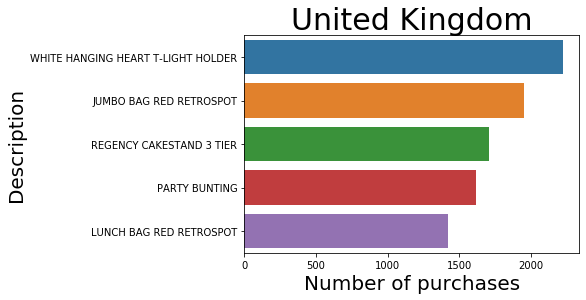

In [35]:
data = online_retail_01[online_retail_01.Country == 'United Kingdom'].groupby('Description')['InvoiceNo'].count().sort_values(ascending=False).head(5)
ax = sns.barplot(x='InvoiceNo', y='Description', data=data.reset_index())
ax.set_title('United Kingdom', fontsize=30)
ax.set_ylabel('Description', fontsize=20)
ax.set_xlabel('Number of purchases', fontsize=20)

Text(0.5, 0, 'Number of purchases')

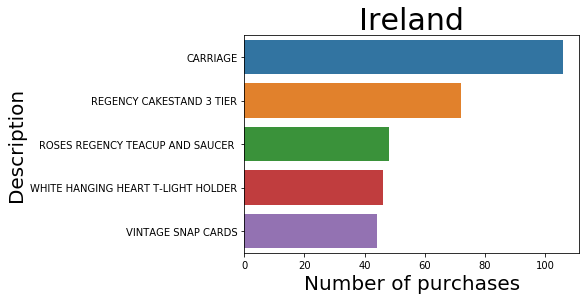

In [36]:
data = online_retail_01[online_retail_01.Country == 'EIRE'].groupby('Description')['InvoiceNo'].count().sort_values(ascending=False).head(5)
ax = sns.barplot(x='InvoiceNo', y='Description', data=data.reset_index())
ax.set_title('Ireland', fontsize=30)
ax.set_ylabel('Description', fontsize=20)
ax.set_xlabel('Number of purchases', fontsize=20)

Text(0.5, 0, 'Number of purchases')

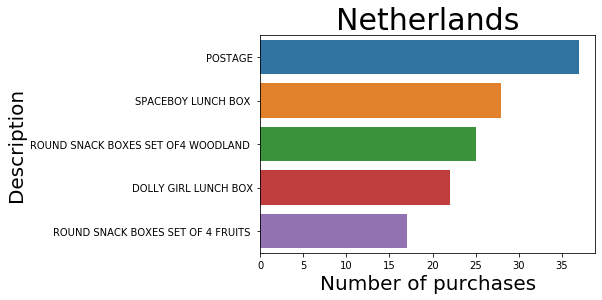

In [37]:
data = online_retail_01[online_retail_01.Country == 'Netherlands'].groupby('Description')['InvoiceNo'].count().sort_values(ascending=False).head(5)
ax = sns.barplot(x='InvoiceNo', y='Description', data=data.reset_index())
ax.set_title('Netherlands', fontsize=30)
ax.set_ylabel('Description', fontsize=20)
ax.set_xlabel('Number of purchases', fontsize=20)

Text(0.5, 0, 'Number of purchases')

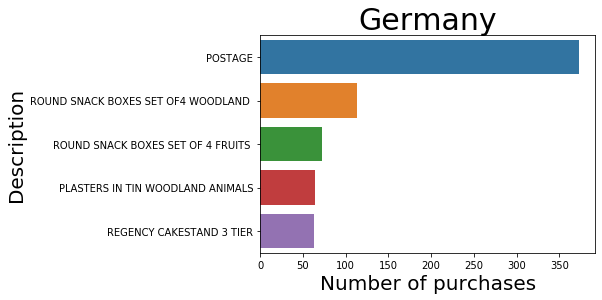

In [38]:
data = online_retail_01[online_retail_01.Country == 'Germany'].groupby('Description')['InvoiceNo'].count().sort_values(ascending=False).head(5)
ax = sns.barplot(x='InvoiceNo', y='Description', data=data.reset_index())
ax.set_title('Germany', fontsize=30)
ax.set_ylabel('Description', fontsize=20)
ax.set_xlabel('Number of purchases', fontsize=20)

Text(0.5, 0, 'Number of purchases')

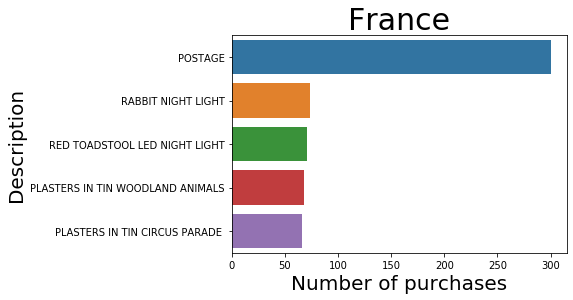

In [39]:
data = online_retail_01[online_retail_01.Country == 'France'].groupby('Description')['InvoiceNo'].count().sort_values(ascending=False).head(5)
ax = sns.barplot(x='InvoiceNo', y='Description', data=data.reset_index())
ax.set_title('France', fontsize=30)
ax.set_ylabel('Description', fontsize=20)
ax.set_xlabel('Number of purchases', fontsize=20)

In [40]:
online_retail_01.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchasedAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3


In [41]:
online_retail_01['InvoiceHour'] = online_retail_01['InvoiceDate'].apply(lambda x: x.hour)

In [42]:
online_retail_01['InvoiceMonth'] = online_retail_01['InvoiceDate'].apply(lambda x: x.month)

In [43]:
online_retail_01['InvoiceDateT'] = online_retail_01['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

In [44]:
online_retail_01.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchasedAmount,InvoiceHour,InvoiceMonth,InvoiceDateT
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,15.3,8,12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3,8,12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22.0,8,12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3,8,12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3,8,12,2010-12-01


Text(0, 0.5, 'Number of purchases')

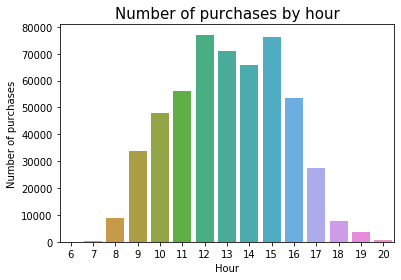

In [45]:
data = online_retail_01.groupby('InvoiceHour')['InvoiceNo'].count()
ax = sns.barplot(x='InvoiceHour',y='InvoiceNo', data=data.reset_index())
ax.set_title('Number of purchases by hour', fontsize=15)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of purchases')

So we see that most of the store's purchases happen around midday and until 4 PM or so. 

Text(0, 0.5, 'Number of purchases')

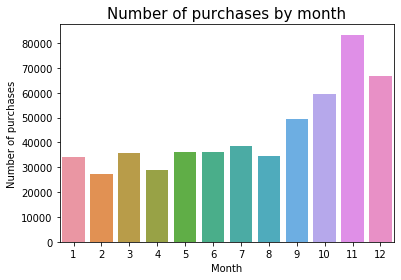

In [46]:
data = online_retail_01.groupby('InvoiceMonth')['InvoiceNo'].count()
ax = sns.barplot(x='InvoiceMonth',y='InvoiceNo', data=data.reset_index())
ax.set_title('Number of purchases by month', fontsize=15)
ax.set_xlabel('Month')
ax.set_ylabel('Number of purchases')

We see that, as we approach Christmas and related holidays, the number of purchases at the store increases. They are particularly high in November, as would be expected. 

## We will now start with the cohort analysis:

In [47]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [48]:
online_retail_01['PurchaseMonth'] = online_retail_01['InvoiceDate'].apply(get_month)

In [49]:
online_retail_01['MonthCohort'] = online_retail_01.groupby('CustomerID')['PurchaseMonth'].transform('min')

In [50]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [51]:
invoice_year, invoice_month, _ = get_date_int(online_retail_01, 'PurchaseMonth')
cohort_year, cohort_month, _ = get_date_int(online_retail_01, 'MonthCohort')

In [52]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [53]:
online_retail_01['CohortIndex'] = years_diff*12 + months_diff

In [54]:
cohort_data = online_retail_01.groupby(['MonthCohort','CohortIndex'])['CustomerID'].apply(pd.Series.nunique)

In [55]:
cohort_data = cohort_data.reset_index()

In [56]:
cohort_counts = cohort_data.pivot(index='MonthCohort',
                                  columns='CohortIndex',
                                  values='CustomerID')

In [57]:
cohort_counts

CohortIndex,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
MonthCohort,,,,,,,,,,,,,
2010-12-01,880.0,323.0,284.0,338.0,321.0,351.0,319.0,306.0,312.0,348.0,331.0,443.0,235.0
2011-01-01,417.0,93.0,112.0,96.0,135.0,121.0,104.0,102.0,126.0,136.0,153.0,49.0,nan
2011-02-01,379.0,71.0,71.0,108.0,102.0,93.0,96.0,104.0,94.0,116.0,26.0,nan,nan
2011-03-01,452.0,67.0,113.0,90.0,101.0,75.0,120.0,104.0,125.0,38.0,nan,nan,nan
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,nan,nan,nan,nan
2011-05-01,282.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,nan,nan,nan,nan,nan
2011-06-01,243.0,42.0,38.0,65.0,56.0,80.0,23.0,nan,nan,nan,nan,nan,nan
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,nan,nan,nan,nan,nan,nan,nan
2011-08-01,169.0,35.0,42.0,41.0,21.0,nan,nan,nan,nan,nan,nan,nan,nan


I will now calculate the retention rate:

In [58]:
cohort_sizes = cohort_counts.iloc[:,0]

In [59]:
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [60]:
retention.round(3)*100

CohortIndex,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
MonthCohort,,,,,,,,,,,,,
2010-12-01,100.0,36.7,32.3,38.4,36.5,39.9,36.2,34.8,35.5,39.5,37.6,50.3,26.7
2011-01-01,100.0,22.3,26.9,23.0,32.4,29.0,24.9,24.5,30.2,32.6,36.7,11.8,nan
2011-02-01,100.0,18.7,18.7,28.5,26.9,24.5,25.3,27.4,24.8,30.6,6.9,nan,nan
2011-03-01,100.0,14.8,25.0,19.9,22.3,16.6,26.5,23.0,27.7,8.4,nan,nan,nan
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,nan,nan,nan,nan
2011-05-01,100.0,19.1,17.4,17.4,20.9,23.4,26.6,9.2,nan,nan,nan,nan,nan
2011-06-01,100.0,17.3,15.6,26.7,23.0,32.9,9.5,nan,nan,nan,nan,nan,nan
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,nan,nan,nan,nan,nan,nan,nan
2011-08-01,100.0,20.7,24.9,24.3,12.4,nan,nan,nan,nan,nan,nan,nan,nan


Text(0.5, 1, 'Retention rate by cohort and month')

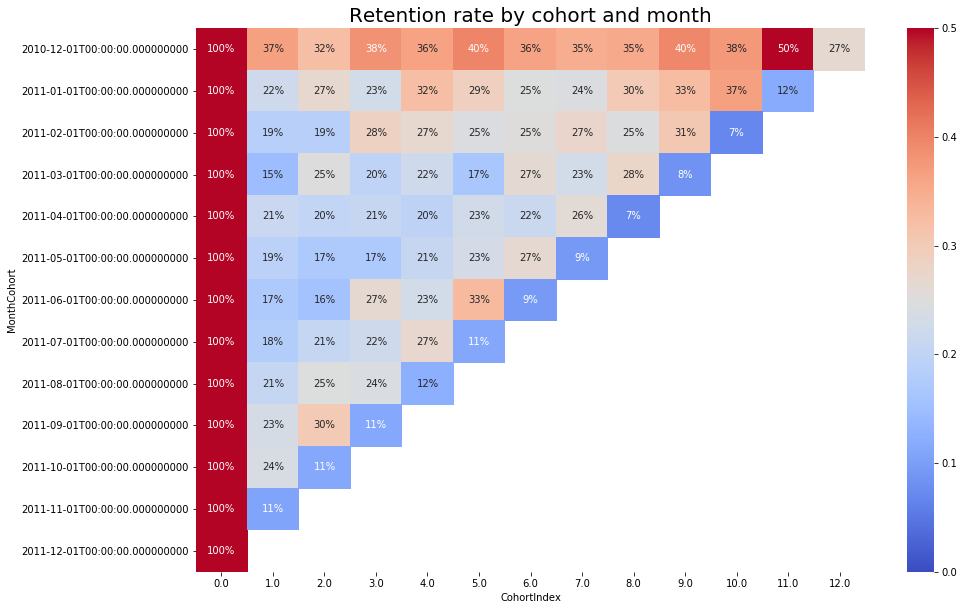

In [76]:
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0,
            vmax = .5,
            cmap = 'coolwarm')
ax.set_title('Retention rate by cohort and month', fontsize=20)

In [62]:
cohort_data = online_retail_01.groupby(['MonthCohort','CohortIndex'])['PurchasedAmount'].mean()

In [63]:
cohort_data = cohort_data.reset_index()

In [64]:
cohort_purchases = cohort_data.pivot(index='MonthCohort',
                                     columns='CohortIndex',
                                     values='PurchasedAmount')

Text(0.5, 1, 'Average purchase by Cohort, Month')

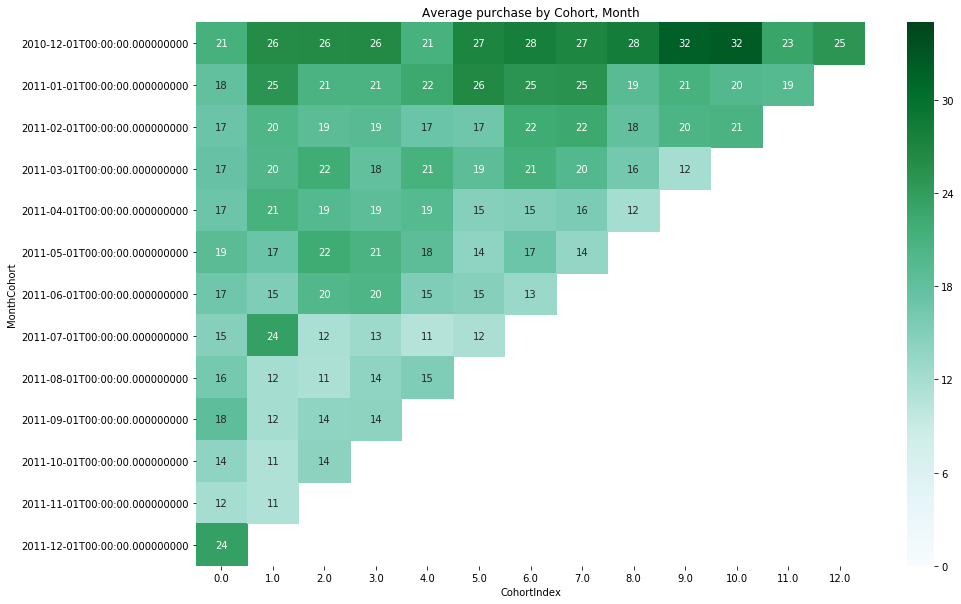

In [75]:
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(data=cohort_purchases,
            annot = True,
            vmin = 0,
            vmax = 35,
            cmap = 'BuGn')
ax.set_title('Average purchase by Cohort, Month')

I will now calculate Frequency, Recency and Monetary Value metrics:

In [66]:
snapshot_date = max(online_retail_01.InvoiceDate) + dt.timedelta(days=1)

In [67]:
datamart = online_retail_01.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                                       'InvoiceNo':'count',
                                                       'PurchasedAmount':'sum'})

In [68]:
datamart.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'PurchasedAmount':'Spend'},inplace=True)

In [69]:
spend_quartiles = pd.qcut(datamart['Spend'],4,labels=range(1,5))
recency_quartiles = pd.qcut(datamart['Recency'],4,labels=range(4,0,-1))
frequency_quartiles = pd.qcut(datamart['Frequency'],4,labels=range(1,5))

In [70]:
datamart['M'] = spend_quartiles
datamart['R'] = recency_quartiles
datamart['F'] = frequency_quartiles

In [71]:
def join_stuff(x): return str(x['M']) + str(x['R']) + str(x['F'])

In [72]:
datamart['RFM_Segment'] = datamart.apply(join_stuff, axis=1)

In [73]:
datamart['Score'] = datamart[['M','R','F']].sum(axis=1)

In [82]:
datamart.head()

,Recency,Frequency,Spend,M,R,F,RFM_Segment,Score
CustomerID,,,,,,,,
12347.0,2,182,4310.0,4,4,4,444,12.0
12348.0,75,31,1797.2,4,2,2,422,8.0
12349.0,19,73,1757.5,4,3,3,433,10.0
12350.0,310,17,334.4,2,1,1,211,4.0
12352.0,36,85,2506.0,4,3,3,433,10.0


Let's now group customers by their score and analyze their metrics:

In [80]:
datamart.groupby('Score').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Spend':['mean','count']}).round()

Recency Frequency  Spend      
         mean      mean   mean count
Score                               
3.0     260.0       8.0  157.0   385
4.0     176.0      14.0  240.0   387
5.0     154.0      21.0  365.0   512
6.0      94.0      28.0  467.0   448
7.0      81.0      39.0  749.0   465
8.0      64.0      56.0  981.0   454
9.0      47.0      81.0 1370.0   410
10.0     32.0     113.0 2023.0   428
11.0     21.0     187.0 3924.0   391
12.0      7.0     373.0 9119.0   449

## KMeans Clustering

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [87]:
seed = 1

In [89]:
datamart_rfs = datamart[['Recency','Frequency','Spend']]

In [90]:
datamart_log = np.log(datamart_rfs)

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(datamart_log)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
datamart_normalized = scaler.transform(datamart_log)

In [94]:
sse = {}

In [95]:
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_

Text(0, 0.5, 'SSE')

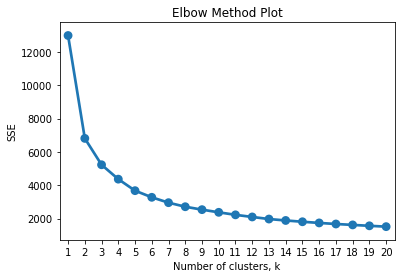

In [96]:
ax = sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
ax.set_title('Elbow Method Plot')
ax.set_xlabel('Number of clusters, k')
ax.set_ylabel('SSE')

In [97]:
kmeans = KMeans(n_clusters=3, random_state=seed)

In [98]:
kmeans.fit(datamart_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [101]:
cluster_labels = kmeans.labels_

In [102]:
datamart_rfs_k3 = datamart_rfs.assign(Cluster=cluster_labels)

In [107]:
cluster_avg = datamart_rfs_k3.groupby('Cluster').mean()

In [120]:
cluster_avg

,Recency,Frequency,Spend
Cluster,,,
0,69.3,65.6,1068.0
1,13.5,262.2,6188.1
2,171.7,14.9,286.5


In [106]:
population_avg = datamart_rfs.mean()

In [111]:
importance = cluster_avg / population_avg - 1

Text(0.5, 1, 'RFS relative importance by cluster')

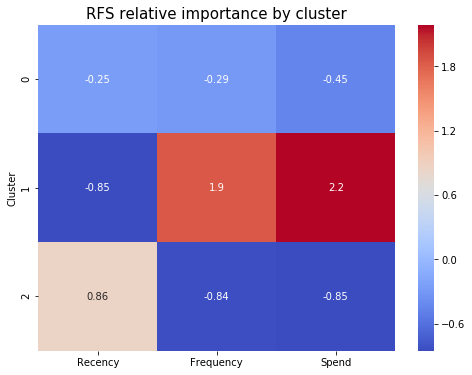

In [119]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(importance,
           annot = True,
           cmap='coolwarm')
ax.set_title('RFS relative importance by cluster', fontsize=15)